In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt


from matplotlib import style
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")


In [2]:
plt.style.use('Solarize_Light2')

## **1. Basic Understanding of The Data!**

#### **Types of Parameters**:

#### 1. **Continuous Parameters**:
- Lead Time
- Average Price Per Room

#### 2. **Categorical Parameters**:
- Meal Plans
- Room Type Reserved.
- Market Segment Type
- Repeated Guest
- Required Car Parking Space

#### 3. **Non-Categorical Params**:
- Adults
- Childrens
- Stays Weekends
- Stays Weeks
- Arrivay Year
- Arrival Month
- Arrival Date
- Number of Prev. Boooking Cancelled.
- Number of Prev. Booking Not Cancelled.
- Number of Special Requests.

#### **Here we can see that we have categorical and continuous variables, we can also see that we have this column Booking ID that will probably not be used, we can also see that we don't have null values.**

In [3]:
df = pd.read_csv("https://github.com/pri-cd/Data-Science-ML/raw/main/Personal-Projects/HOTEL-DATA-EDA/Data/Hotel-CSV.csv", sep=',')
df.rename(columns = {
    'no_of_adults': 'Adults',
    'no_of_children': 'Childrens',
    'no_of_weekend_nights': 'Stays_Weekends',
    'no_of_week_nights': 'Stays_Weeks',
    'type_of_meal_plan': 'Meals',
    'required_car_parking_space': 'Req_Car_Parking_Space',
    'room_type_reserved': 'Room_Type_Reserved',
    'lead_time': 'Lead_Time',
    'arrival_year': 'ArrivalDateYr',
    'arrival_month': 'ArrivalDateMonth',
    'arrival_date': 'ArrivalDateDt',
    'market_segment_type': 'MktSegment',
    'repeated_guest': 'Repeated_Guest',
    'no_of_previous_cancellations': 'PrevCancellations',
    'no_of_previous_bookings_not_canceled': 'PrevBookingNotCancelled',
    'avg_price_per_room': 'AvgPrice_PerRoom',
    'no_of_special_requests': 'SpecialReqs',
    'booking_status': 'BookingStatus'
}, inplace=True)
data_encode = df.copy()

In [4]:
continuous = ['Lead_Time', 'AvgPrice_PerRoom']
nonCategorical = ['Adults', 'Childrens', 'Stays_Weekends', 'Stays_Weeks', 'ArrivalDateYr', 'ArrivalDateMonth', 'ArrivalDateDt', 'PrevCancellations', 'PrevBookingNotCancelled', 'SpecialReqs']
categorical = ['Meals', 'Room_Type_Reserved', 'MktSegment', 'Repeated_Guest', 'Req_Car_Parking_Space']

In [5]:
df[continuous + nonCategorical + categorical]

,Lead_Time,AvgPrice_PerRoom,Adults,Childrens,Stays_Weekends,Stays_Weeks,ArrivalDateYr,ArrivalDateMonth,ArrivalDateDt,PrevCancellations,PrevBookingNotCancelled,SpecialReqs,Meals,Room_Type_Reserved,MktSegment,Repeated_Guest,Req_Car_Parking_Space
0,224,65.00,2,0,1,2,2017,10,2,0,0,0,Meal Plan 1,Room_Type 1,Offline,0,0
1,5,106.68,2,0,2,3,2018,11,6,0,0,1,Not Selected,Room_Type 1,Online,0,0
2,1,60.00,1,0,2,1,2018,2,28,0,0,0,Meal Plan 1,Room_Type 1,Online,0,0
3,211,100.00,2,0,0,2,2018,5,20,0,0,0,Meal Plan 1,Room_Type 1,Online,0,0
4,48,94.50,2,0,1,1,2018,4,11,0,0,0,Not Selected,Room_Type 1,Online,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,85,167.80,3,0,2,6,2018,8,3,0,0,1,Meal Plan 1,Room_Type 4,Online,0,0
36271,228,90.95,2,0,1,3,2018,10,17,0,0,2,Meal Plan 1,Room_Type 1,Online,0,0
36272,148,98.39,2,0,2,6,2018,7,1,0,0,2,Meal Plan 1,Room_Type 1,Online,0,0
36273,63,94.50,2,0,0,3,2018,4,21,0,0,0,Not Selected,Room_Type 1,Online,0,0


#### Use **"Label Encoder"** in order to transform data into numerical values.

In [6]:
df.Meals.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [7]:
encodeLabels = ['Meals', 'Room_Type_Reserved',
                    'MktSegment', 'BookingStatus',
                    'Req_Car_Parking_Space', 'Repeated_Guest']

for label in encodeLabels:
    data_encode[label] = data_encode[label].astype('category')
    data_encode[label] = data_encode[label].cat.codes

'''
    @Code: df.Room_Type_Reserved.unique()
    @Ansr: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5' 'Room_Type 7' 'Room_Type 3'] (1-7)

'''

df.Repeated_Guest.replace(0, "No", inplace=True)
df.Repeated_Guest.replace(1, "Yes", inplace=True)

df.BookingStatus.replace('Not_Canceled', 'Not Cancelled', inplace=True)
df.BookingStatus.replace('Canceled', 'Cancelled', inplace=True)


df['Req_Car_Parking_Space'].replace(0, "No", inplace=True)
df['Req_Car_Parking_Space'].replace(1, "Yes", inplace=True)


lblEncoder = LabelEncoder()

'''
    @Brief: Using Label Encoder For -> Meals & Room Types. To Convert them into Numerical Values instead of String Vars.

    Since, We don't know the behaviour of LabelEncoder in Depth!.
'''
df.Meals = lblEncoder.fit_transform(df.Meals) + 1
df.Room_Type_Reserved = lblEncoder.fit_transform(df.Room_Type_Reserved) + 1

df.head(5)

,Booking_ID,Adults,Childrens,Stays_Weekends,Stays_Weeks,Meals,Req_Car_Parking_Space,Room_Type_Reserved,Lead_Time,ArrivalDateYr,ArrivalDateMonth,ArrivalDateDt,MktSegment,Repeated_Guest,PrevCancellations,PrevBookingNotCancelled,AvgPrice_PerRoom,SpecialReqs,BookingStatus
0,INN00001,2,0,1,2,1,No,1,224,2017,10,2,Offline,No,0,0,65.00,0,Not Cancelled
1,INN00002,2,0,2,3,4,No,1,5,2018,11,6,Online,No,0,0,106.68,1,Not Cancelled
2,INN00003,1,0,2,1,1,No,1,1,2018,2,28,Online,No,0,0,60.00,0,Cancelled
3,INN00004,2,0,0,2,1,No,1,211,2018,5,20,Online,No,0,0,100.00,0,Cancelled
4,INN00005,2,0,1,1,4,No,1,48,2018,4,11,Online,No,0,0,94.50,0,Cancelled


In [8]:
df.Meals.unique()

array([1, 4, 2, 3])

In [9]:
df.describe()

,Adults,Childrens,Stays_Weekends,Stays_Weeks,Meals,Room_Type_Reserved,Lead_Time,ArrivalDateYr,ArrivalDateMonth,ArrivalDateDt,PrevCancellations,PrevBookingNotCancelled,AvgPrice_PerRoom,SpecialReqs
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,1.515644,1.708890,85.232557,2017.820427,7.423653,15.596995,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,1.048131,1.399851,85.930817,0.383836,3.069894,8.740447,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,1.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,4.000000,7.000000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,540.000000,5.000000


## **2. Data Analysis!**
- Here, We can now look at the Correlation between all Variables.

In [10]:
'''
    @func: remove_outliers
    @usage: This functions remove Outliers on the basis of removing the extreme values in the Dataset.
    @steps:
        Finds Q1, Finds Q3, Finds IQR (InterQuartile Range) = Q3 - Q1.
        Filter is Applied Over Lower Bounds & Upper Bounds!
======================================================================================================
    @explaination:
    Q. What Are Quartiles?
    A.
        1st Quartile (Q1): The 1st quartile is the value below which 25% of the data falls.
        It is the 25th percentile of the dataset.

        2nd Quartile (Q2): The 2nd quartile is the median of the dataset.
        It is the value below which 50% of the data falls. The median is often used as a measure
        of central tendency.

        3rd Quartile (Q3): The 3rd quartile is the value below which 75% of the data falls.
        It is the 75th percentile of the dataset.

        4th Quartile: While the term "4th quartile" is not commonly used,
        it could refer to the portion of the data above the third quartile, representing the top
        25% of the data.
'''
def remove_outliers(df, label):
    q1 = df[label].quantile(0.25)
    q3 = df[label].quantile(0.75)
    iqr = (q3 - q1)
    fil = (df[label] >= q1 - 1.5 * iqr) & (df[label] <= q3 + 1.5 * iqr)
    return df.loc[fil]

### **Correlation In the Data ?**
- There's no strong "Correlation" in the Below Variables as Shown below.

<Axes: >

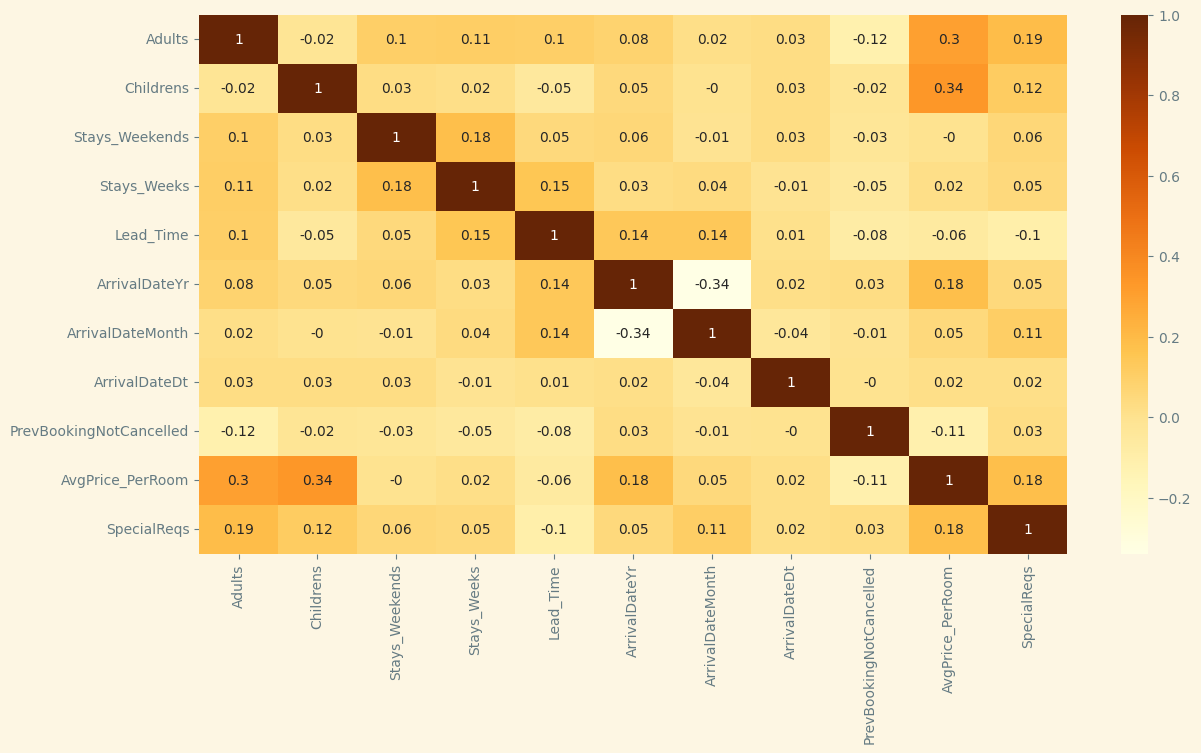

In [11]:
correlation = df[['Adults', 'Childrens', 'Stays_Weekends', 'Stays_Weeks', 'Lead_Time', 'ArrivalDateYr', 'ArrivalDateMonth', 'ArrivalDateDt', 'PrevBookingNotCancelled', 'AvgPrice_PerRoom', 'SpecialReqs']].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

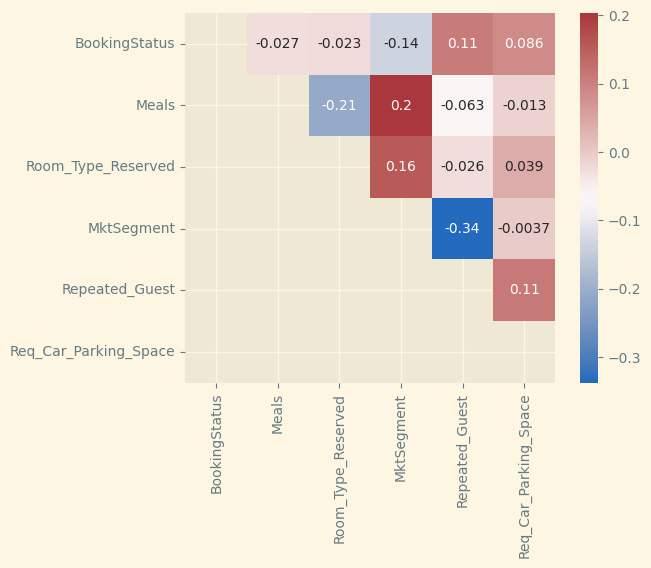

In [12]:
corr = data_encode[['BookingStatus'] + categorical].corr()
sns.heatmap(corr, mask=np.tril(corr), annot=True, cmap='vlag', square=True)
del(corr)

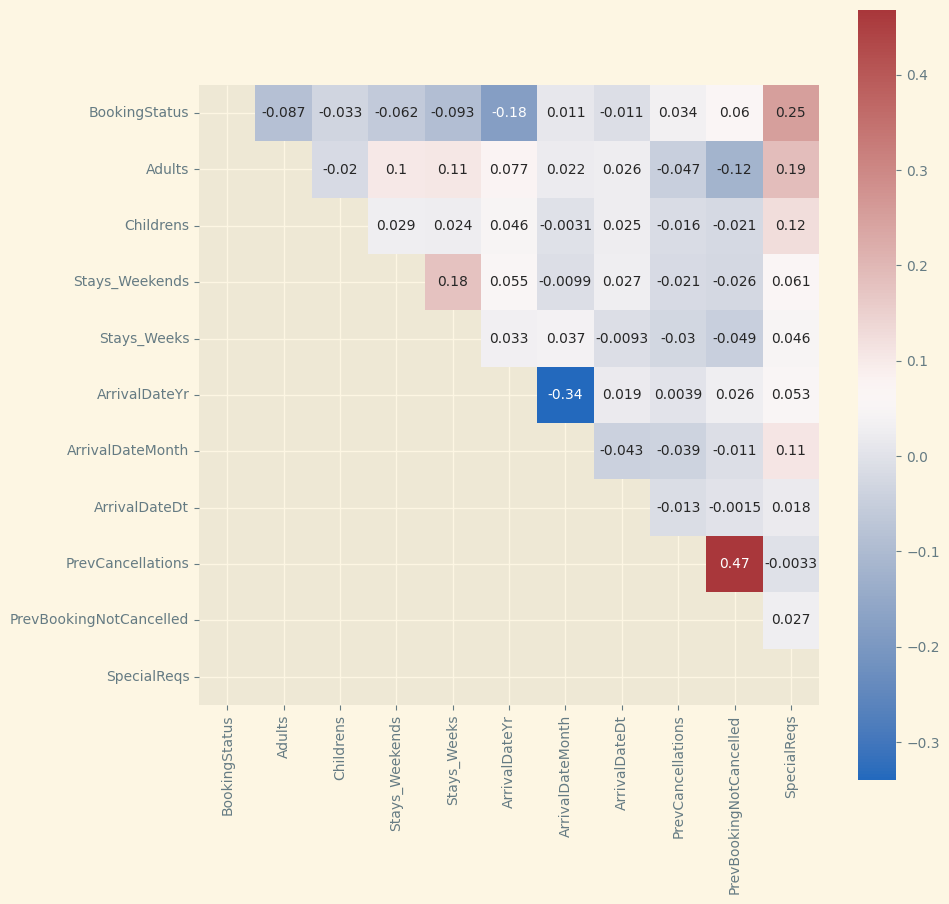

In [13]:
fig = plt.figure(figsize=(10, 10))
corr = data_encode[['BookingStatus'] + nonCategorical].corr()
sns.heatmap(corr, mask=np.tril(corr), annot=True, cmap='vlag', square=True)
del(corr)
del(fig)

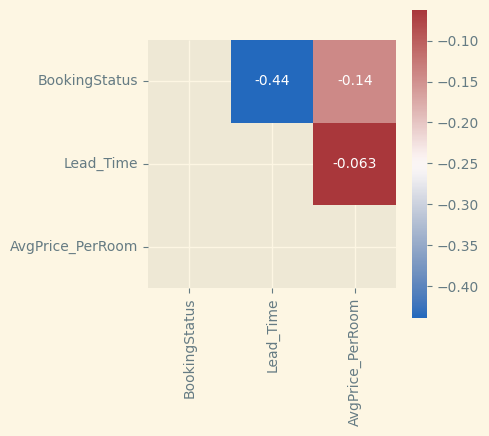

In [14]:
fig = plt.figure(figsize=(4, 4))
corr = data_encode[['BookingStatus'] + continuous].corr()
sns.heatmap(corr, mask=np.tril(corr), annot=True, cmap='vlag', square=True)
del(fig)
del(corr)

#### **Singular Analysis:**

Text(0.5, 0, 'Arrival Year')

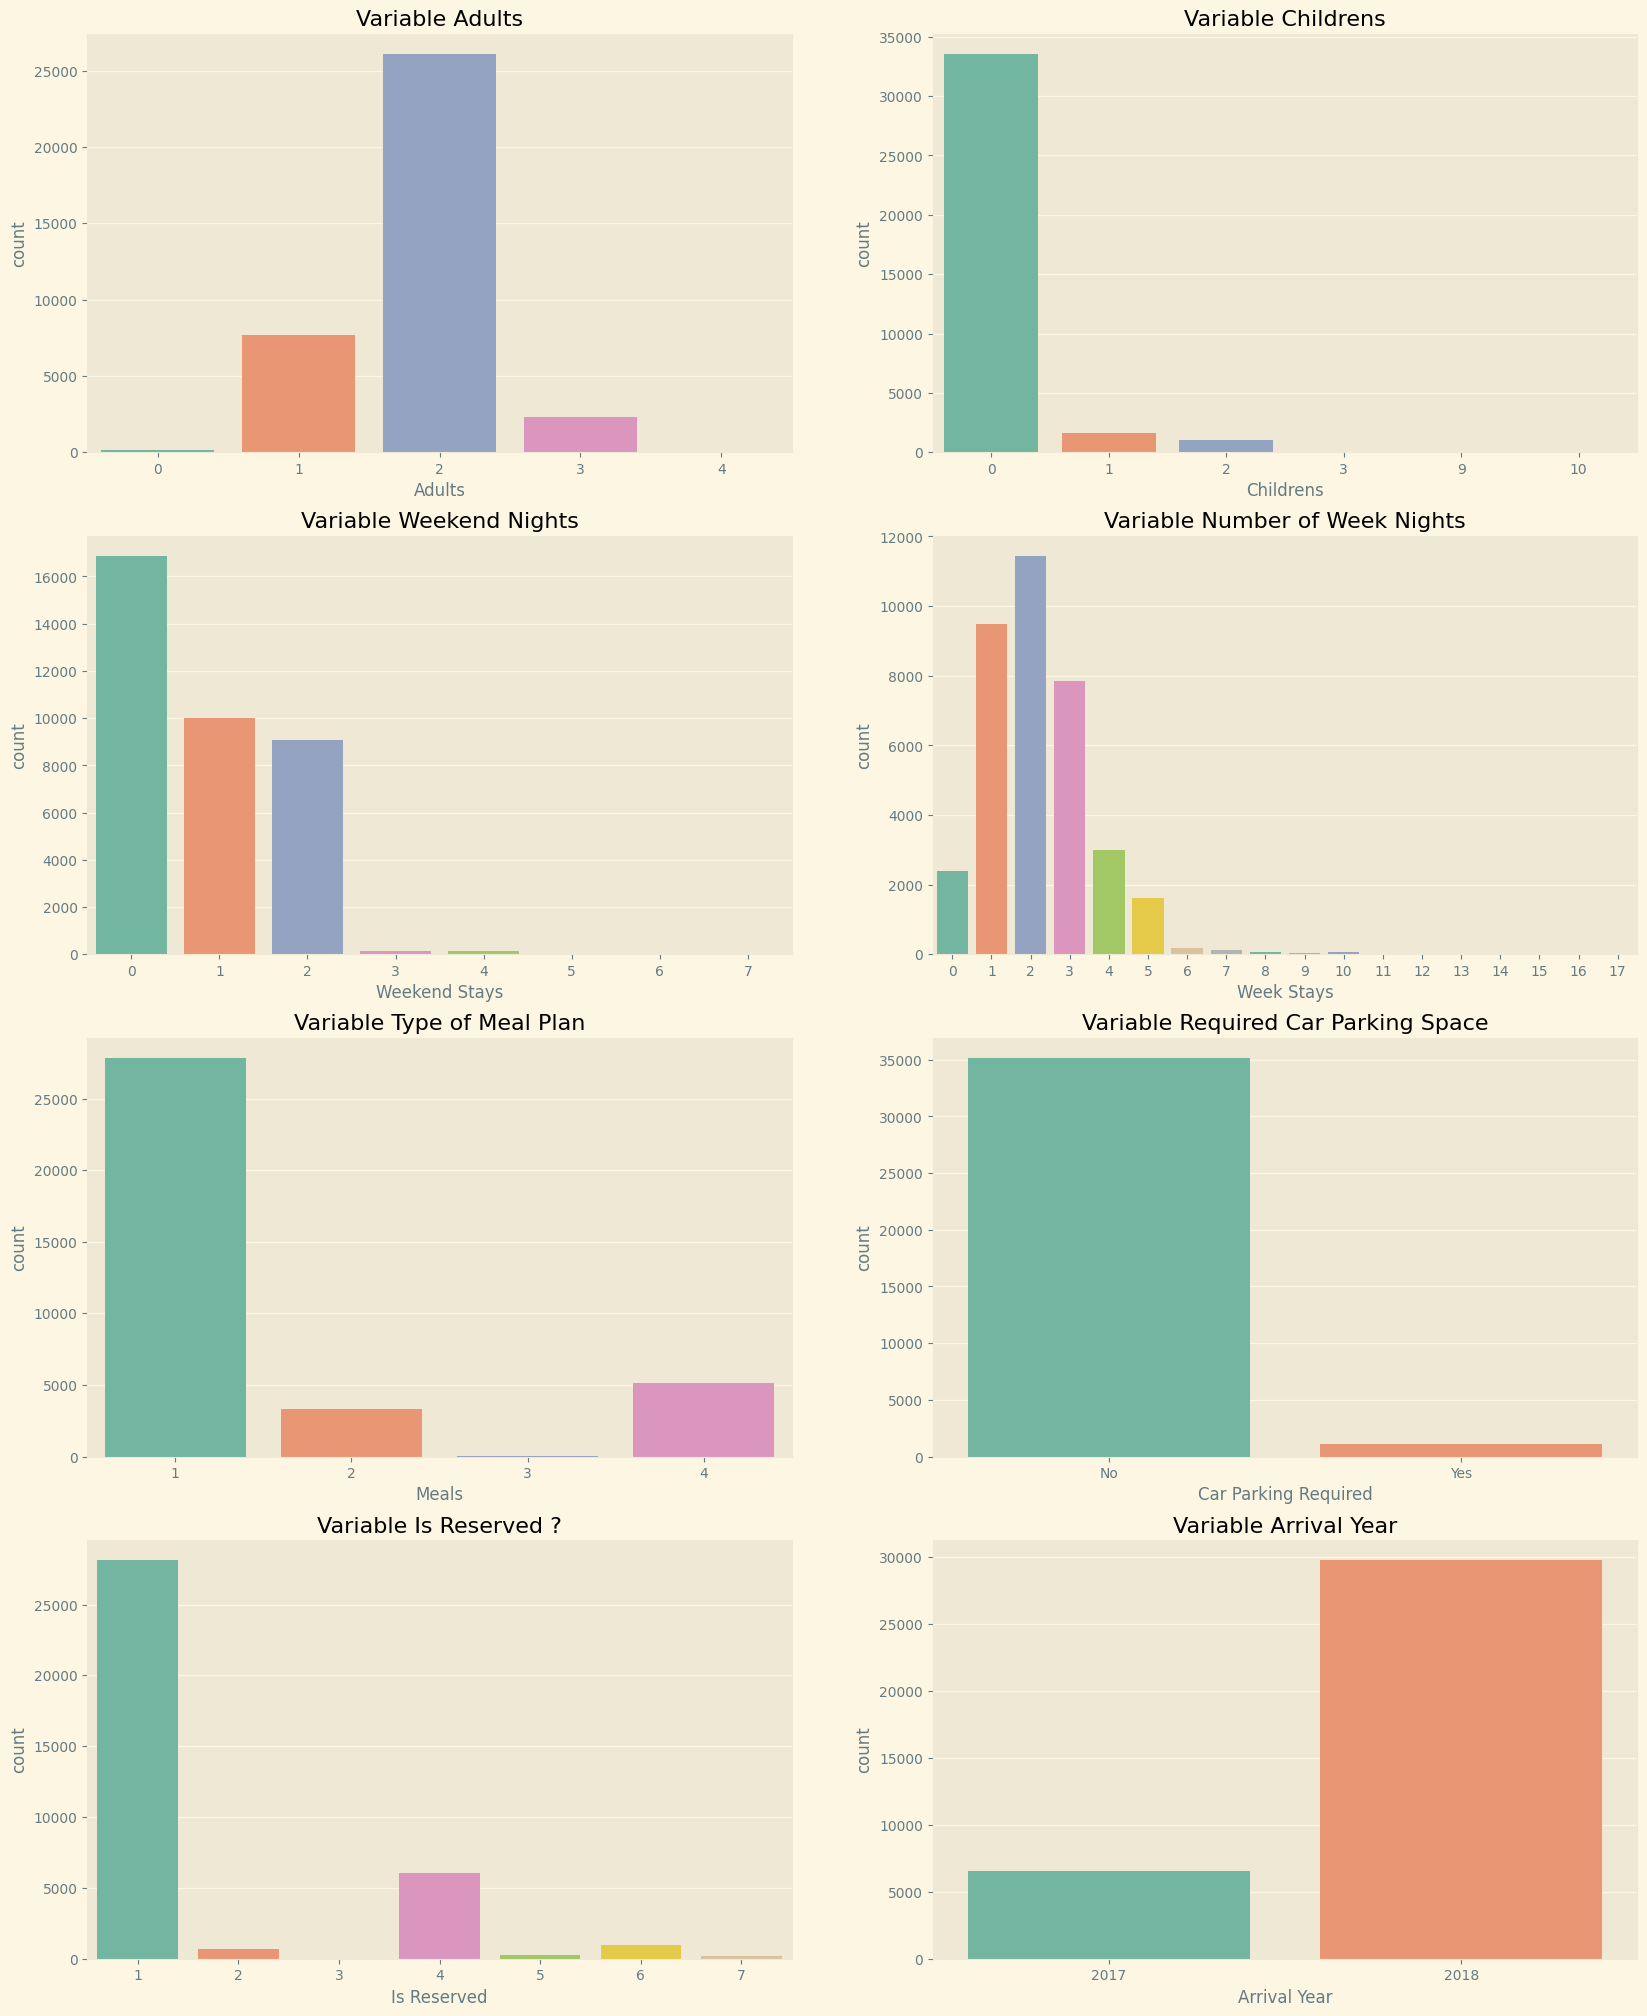

In [15]:
'''
@brief:
    - plt.figure(figsize=(20, 25)):
        This line creates a new figure with a
        specified size of 20 inches in width and 25 inches in height.

    - plt.subplot(4, 2, 1):
        This line creates a subplot grid with 4 rows, 2 columns, and selects
        the first subplot (1-indexed).

    - plt.gca().set_title('Variable Adults'):
        This line gets the current Axes instance (plt.gca()) and sets the title
        of the subplot to 'Variable no_of_adults'. This is the title that will be
        displayed above the subplot.

    - sns.countplot(x='Adults', palette='Set2', data=df):
        This line uses the seaborn library to create a countplot.
        A countplot is a bar plot that shows the counts of observations in each categorical bin.
'''

plt.figure(figsize=(20, 25))

# Plotting Count-Plot.
# 1st Plot!
plt.subplot(4,2,1)
plt.gca().set_title('Variable Adults')
sns.countplot(x = 'Adults', palette = 'Set2', data = df)

# 2nd Plot!
plt.subplot(4,2,2)
plt.gca().set_title('Variable Childrens')
sns.countplot(x = 'Childrens', palette = 'Set2', data = df)

# 3rd Plot!
plt.subplot(4,2,3)
plt.gca().set_title('Variable Weekend Nights')
sns.countplot(x = 'Stays_Weekends',palette = 'Set2', data = df)
plt.gca().set_xlabel('Weekend Stays')

# 4th Plot!
plt.subplot(4,2,4)
plt.gca().set_title('Variable Number of Week Nights')
sns.countplot(x = 'Stays_Weeks', palette = 'Set2', data = df)
plt.gca().set_xlabel('Week Stays')

plt.subplot(4,2,5)
plt.gca().set_title('Variable Type of Meal Plan')
sns.countplot(x = 'Meals', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable Required Car Parking Space')
sns.countplot(x = 'Req_Car_Parking_Space', palette = 'Set2', data = df)
plt.gca().set_xlabel('Car Parking Required')

plt.subplot(4,2,7)
plt.gca().set_title('Variable Is Reserved ?')
sns.countplot(x = 'Room_Type_Reserved', palette = 'Set2', data = df)
plt.gca().set_xlabel('Is Reserved')

plt.subplot(4,2,8)
plt.gca().set_title('Variable Arrival Year')
sns.countplot(x = 'ArrivalDateYr', palette = 'Set2', data = df)
plt.gca().set_xlabel('Arrival Year')

### **Above Categorical Variables ?**
- Most Reservation With **Two adults, Without children**.
- Generally, reservations are **short-term**, not many cases are long-term.
- Most reservations select **Meal 1**,
- No need a **car space**.
- The most booked room types are types 1 and 4.
- Most of our data is **2018** bookings.

Text(0.5, 0, 'Booking Status ?')

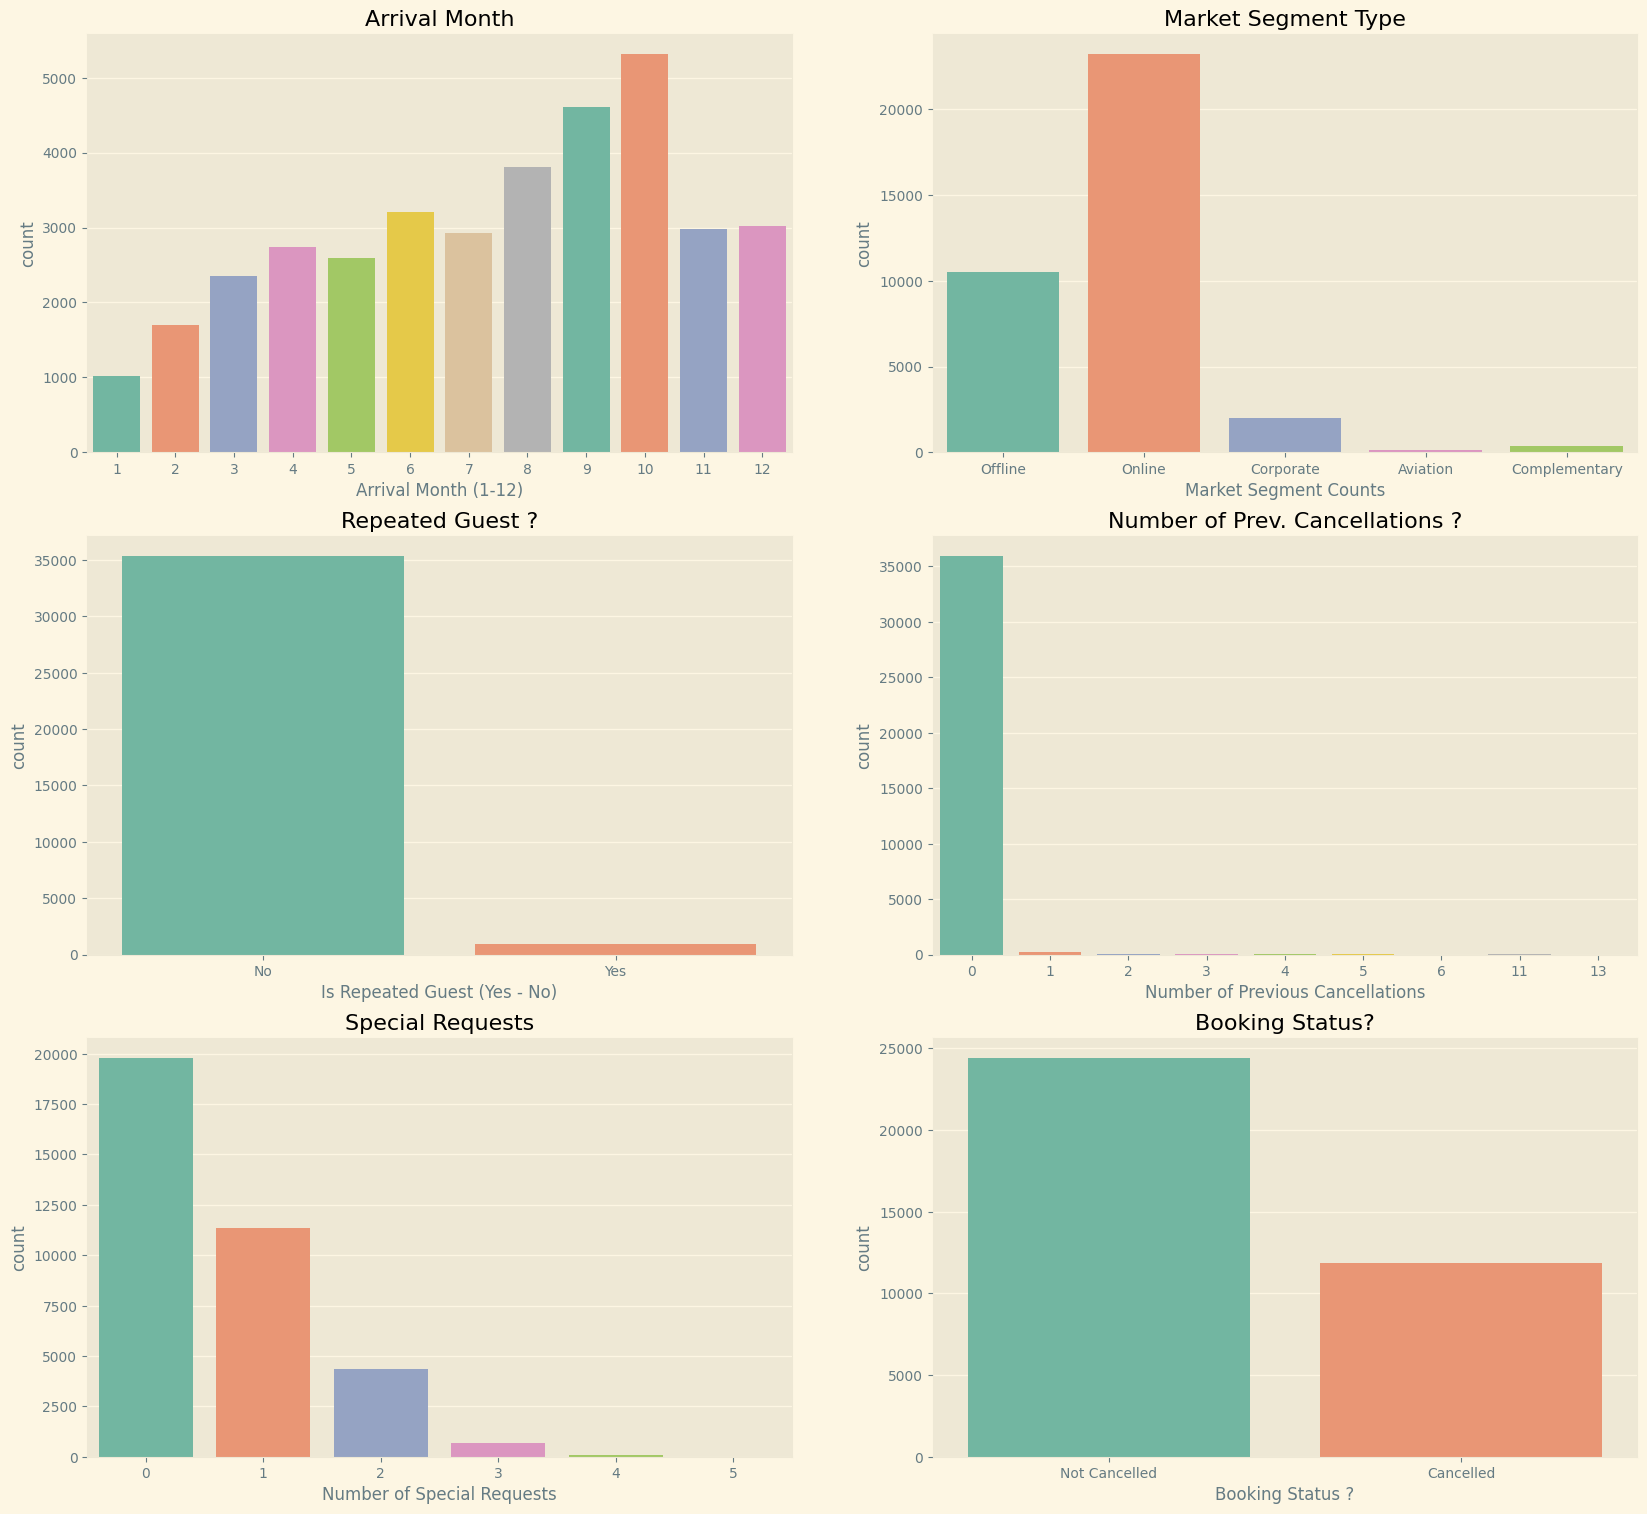

In [16]:
plt.figure(figsize = (20,25))

# Plotting Count-Plot.
plt.subplot(4, 2, 1)
plt.gca().set_title('Arrival Month')
sns.countplot(x='ArrivalDateMonth', palette='Set2', data=df)
plt.gca().set_xlabel('Arrival Month (1-12)')

plt.subplot(4, 2, 2)
plt.gca().set_title('Market Segment Type')
sns.countplot(x='MktSegment', palette='Set2', data=df)
plt.gca().set_xlabel('Market Segment Counts')

plt.subplot(4, 2, 3)
plt.gca().set_title('Repeated Guest ?')
sns.countplot(x='Repeated_Guest', palette='Set2', data=df)
plt.gca().set_xlabel('Is Repeated Guest (Yes - No)')

plt.subplot(4, 2, 4)
plt.gca().set_title('Number of Prev. Cancellations ?')
sns.countplot(x='PrevCancellations', palette='Set2', data=df)
plt.gca().set_xlabel('Number of Previous Cancellations')

plt.subplot(4, 2, 5)
plt.gca().set_title('Special Requests')
sns.countplot(x='SpecialReqs', palette='Set2', data=df)
plt.gca().set_xlabel('Number of Special Requests')

plt.subplot(4, 2, 6)
plt.gca().set_title('Booking Status?')
sns.countplot(x='BookingStatus', palette='Set2', data=df)
plt.gca().set_xlabel('Booking Status ?')

### Bookings:
- **Increase** in **January** to **October**.
- **Drops** in **November** & **Decemeber**.
- Mostly bookings are done **Online**.
- Most Guests are **First Timers**.
- Mostly **Never Cancelled**. (65%)

**Note: The greater the number of special requests, the less data we have.**

Text(0.5, 0, 'Number of Prev. Booking Not Cancelled')

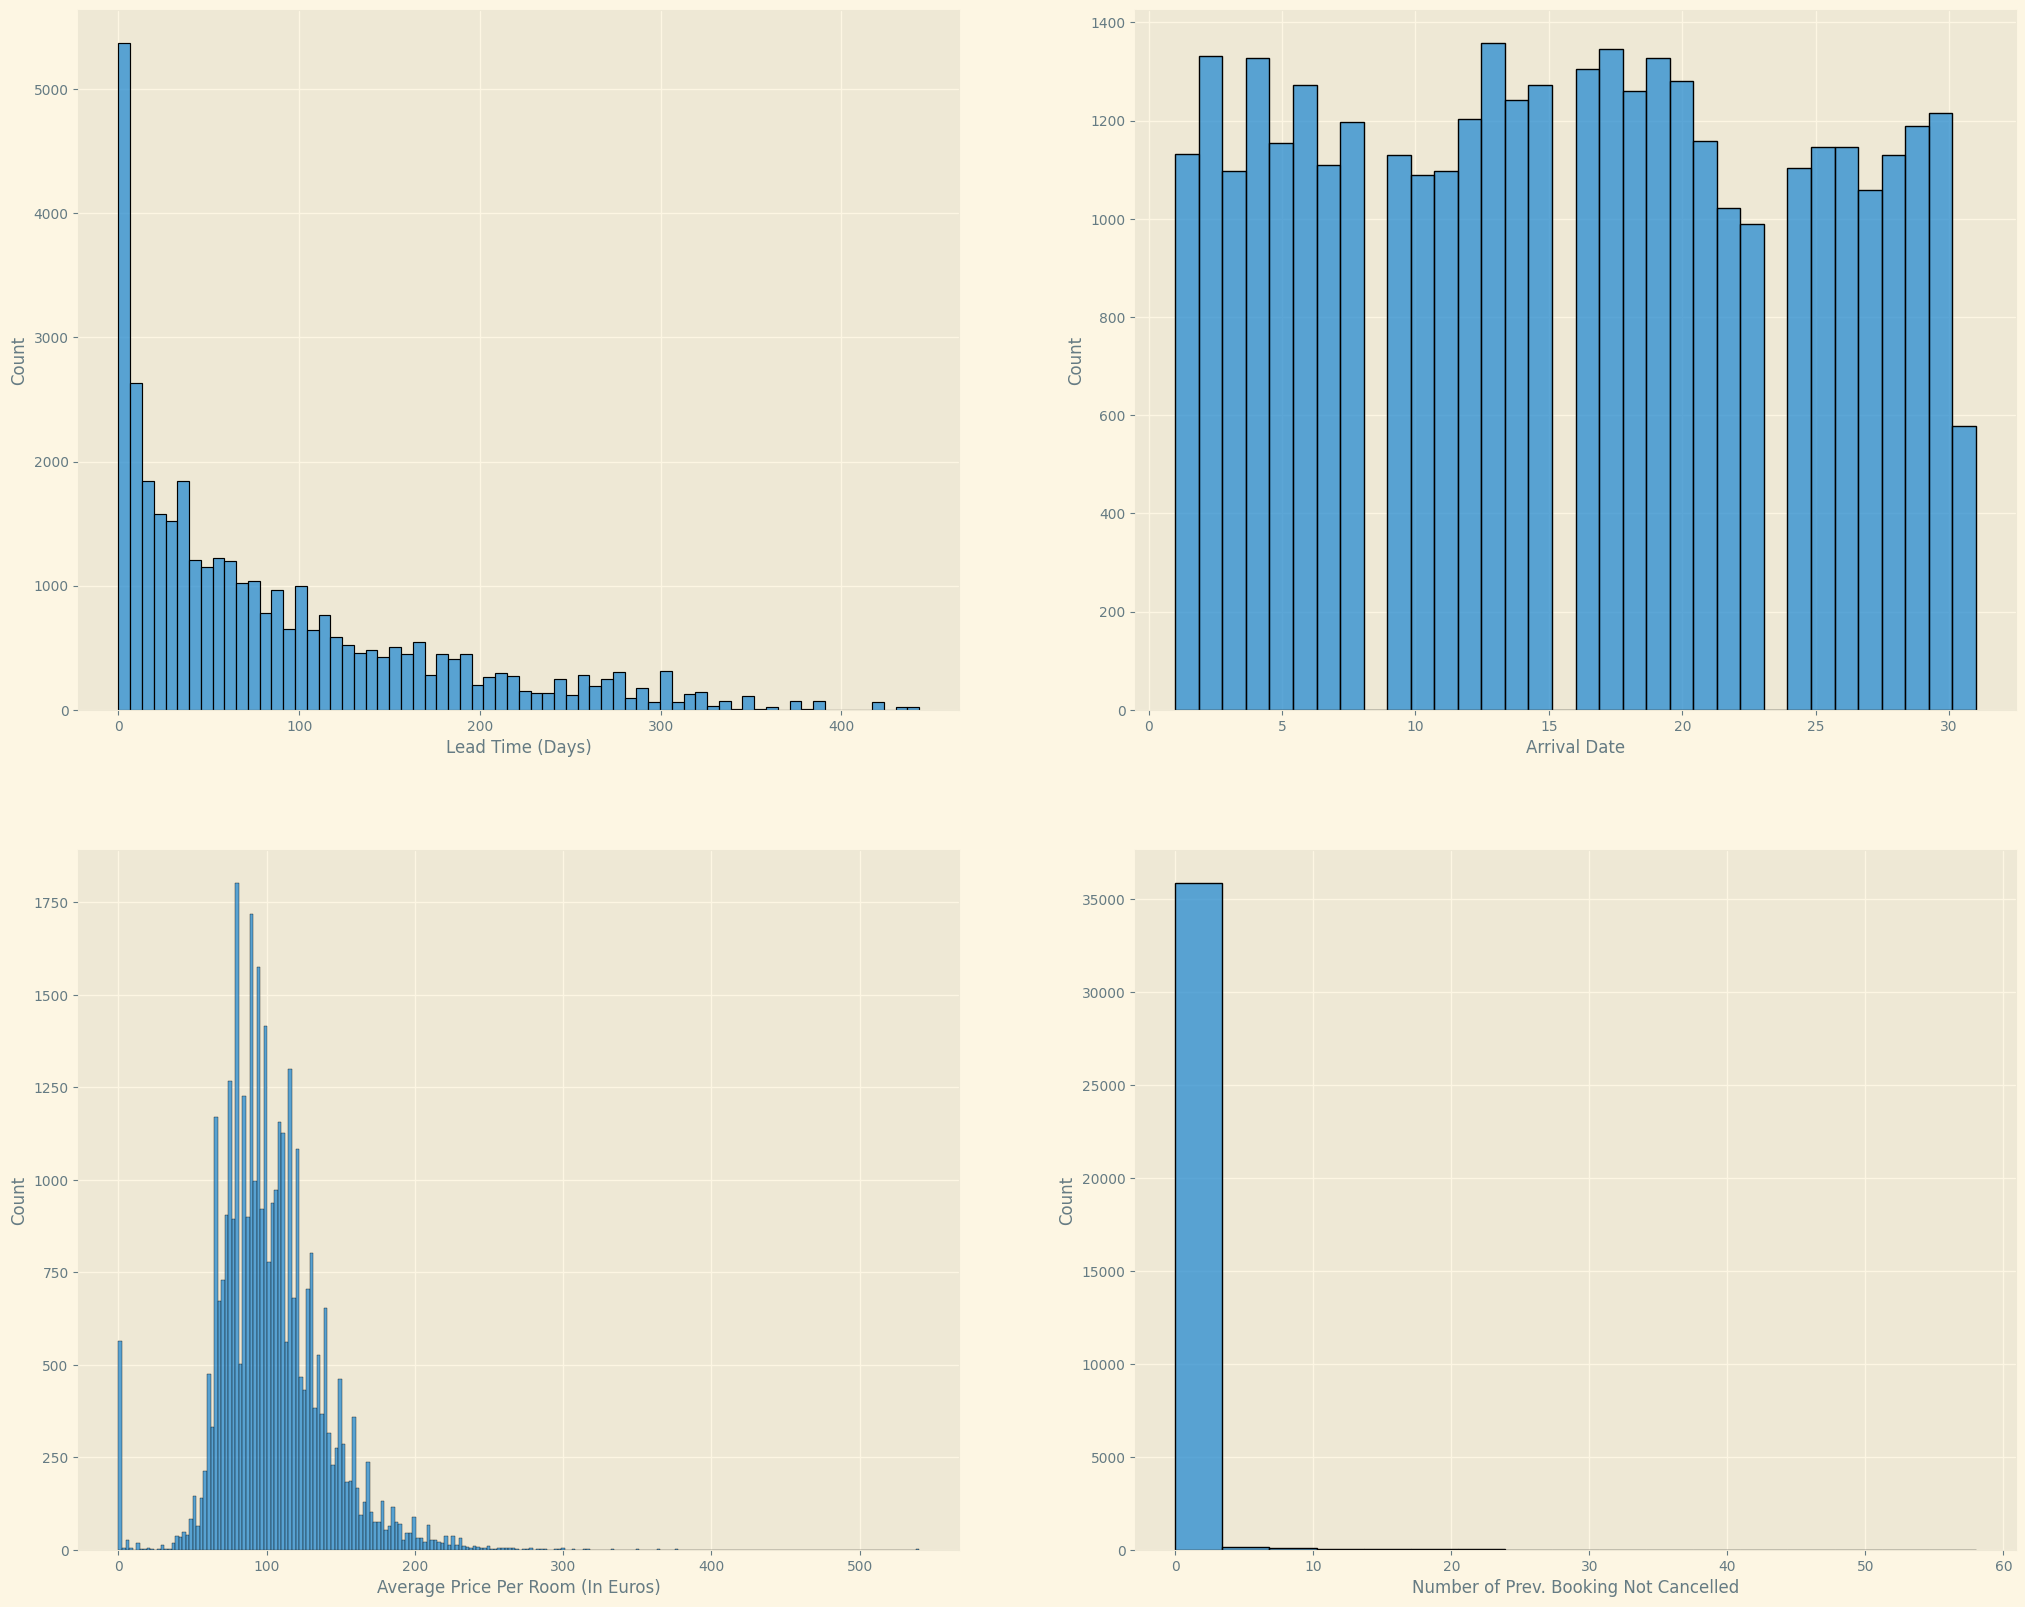

In [17]:
plt.figure(figsize = (25,20))


# Plotting Hist-Plots.
plt.subplot(2, 2, 1)
sns.histplot(data=df.Lead_Time, kde=False)
plt.gca().set_xlabel('Lead Time (Days)')



plt.subplot(2, 2, 2)
sns.histplot(data=df.ArrivalDateDt, kde=False)
plt.gca().set_xlabel('Arrival Date')


plt.subplot(2, 2, 3)
sns.histplot(data=df.AvgPrice_PerRoom, kde=False)
plt.gca().set_xlabel('Average Price Per Room (In Euros)')


plt.subplot(2, 2, 4)
sns.histplot(data=df.PrevBookingNotCancelled, kde=False)
plt.gca().set_xlabel('Number of Prev. Booking Not Cancelled')

### **Hist-Plot Outcomes**
- Most of the Lead Time is Less.
- That means bookings are made **without taking too long**.
- The **longer it takes** the **less amount of reservations**.
- The booking **price** is mostly about **100 Euros**.
- Average people never **cancel** a booking before.

The Precise Skewness of The Data is: 1.292438086907913


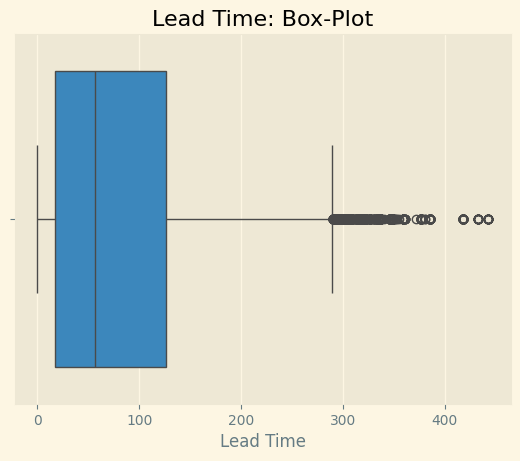

In [18]:

'''
@brief:
- The First Line represents 'Min' Value,
- The Second Line inside the box plot Represents 'Median' Value.
- The Third Line end of X-Axis is called 'Max' Value.
- The box(IQR) contains: Between (Lower Quartile)Q1 - (Upper Quartile)Q3 Data.

'''

'''
@brief:
- Symmetrical    : If the box plot is symmetric, it suggests that the data is approximately symmetrical, and the skewness is close to 0 .
- (+ve) Skewness : If the box plot is "stretched" to the right, with a longer right tail, it suggests +ve skewness.
- (-ve) Skewness : If the box plot is "stretched" to the left, with a longer left tail, it suggests -ve skewness.

'''
plt.title('Lead Time: Box-Plot')
sns.boxplot(x=df.Lead_Time)
plt.xlabel('Lead Time')
print(f"The Precise Skewness of The Data is: {stat.skew(df.Lead_Time)}")

### **Lead Time Boxplot Results**
- **Positive** Skewness
- We can see that we have **some outliers**.
- But, For now we are **not** going to deal with them.

Text(0.5, 0, 'Average Price Per Room')

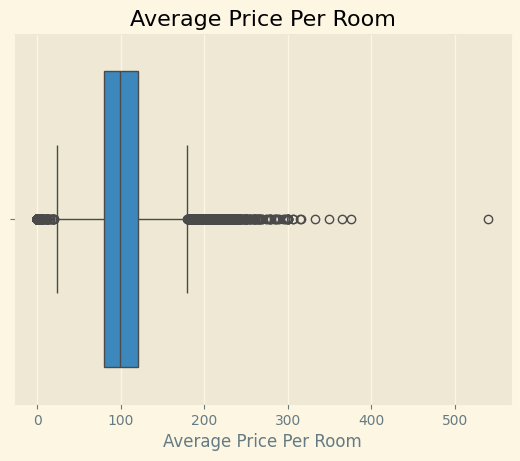

In [19]:
plt.title('Average Price Per Room')
sns.boxplot(x=df.AvgPrice_PerRoom)
plt.xlabel('Average Price Per Room')

### **3. Bivariate Analysis**
- We'll be looking at Bivariate Analysis

Text(0.5, 0, 'Booking Status Per Arrival Year')

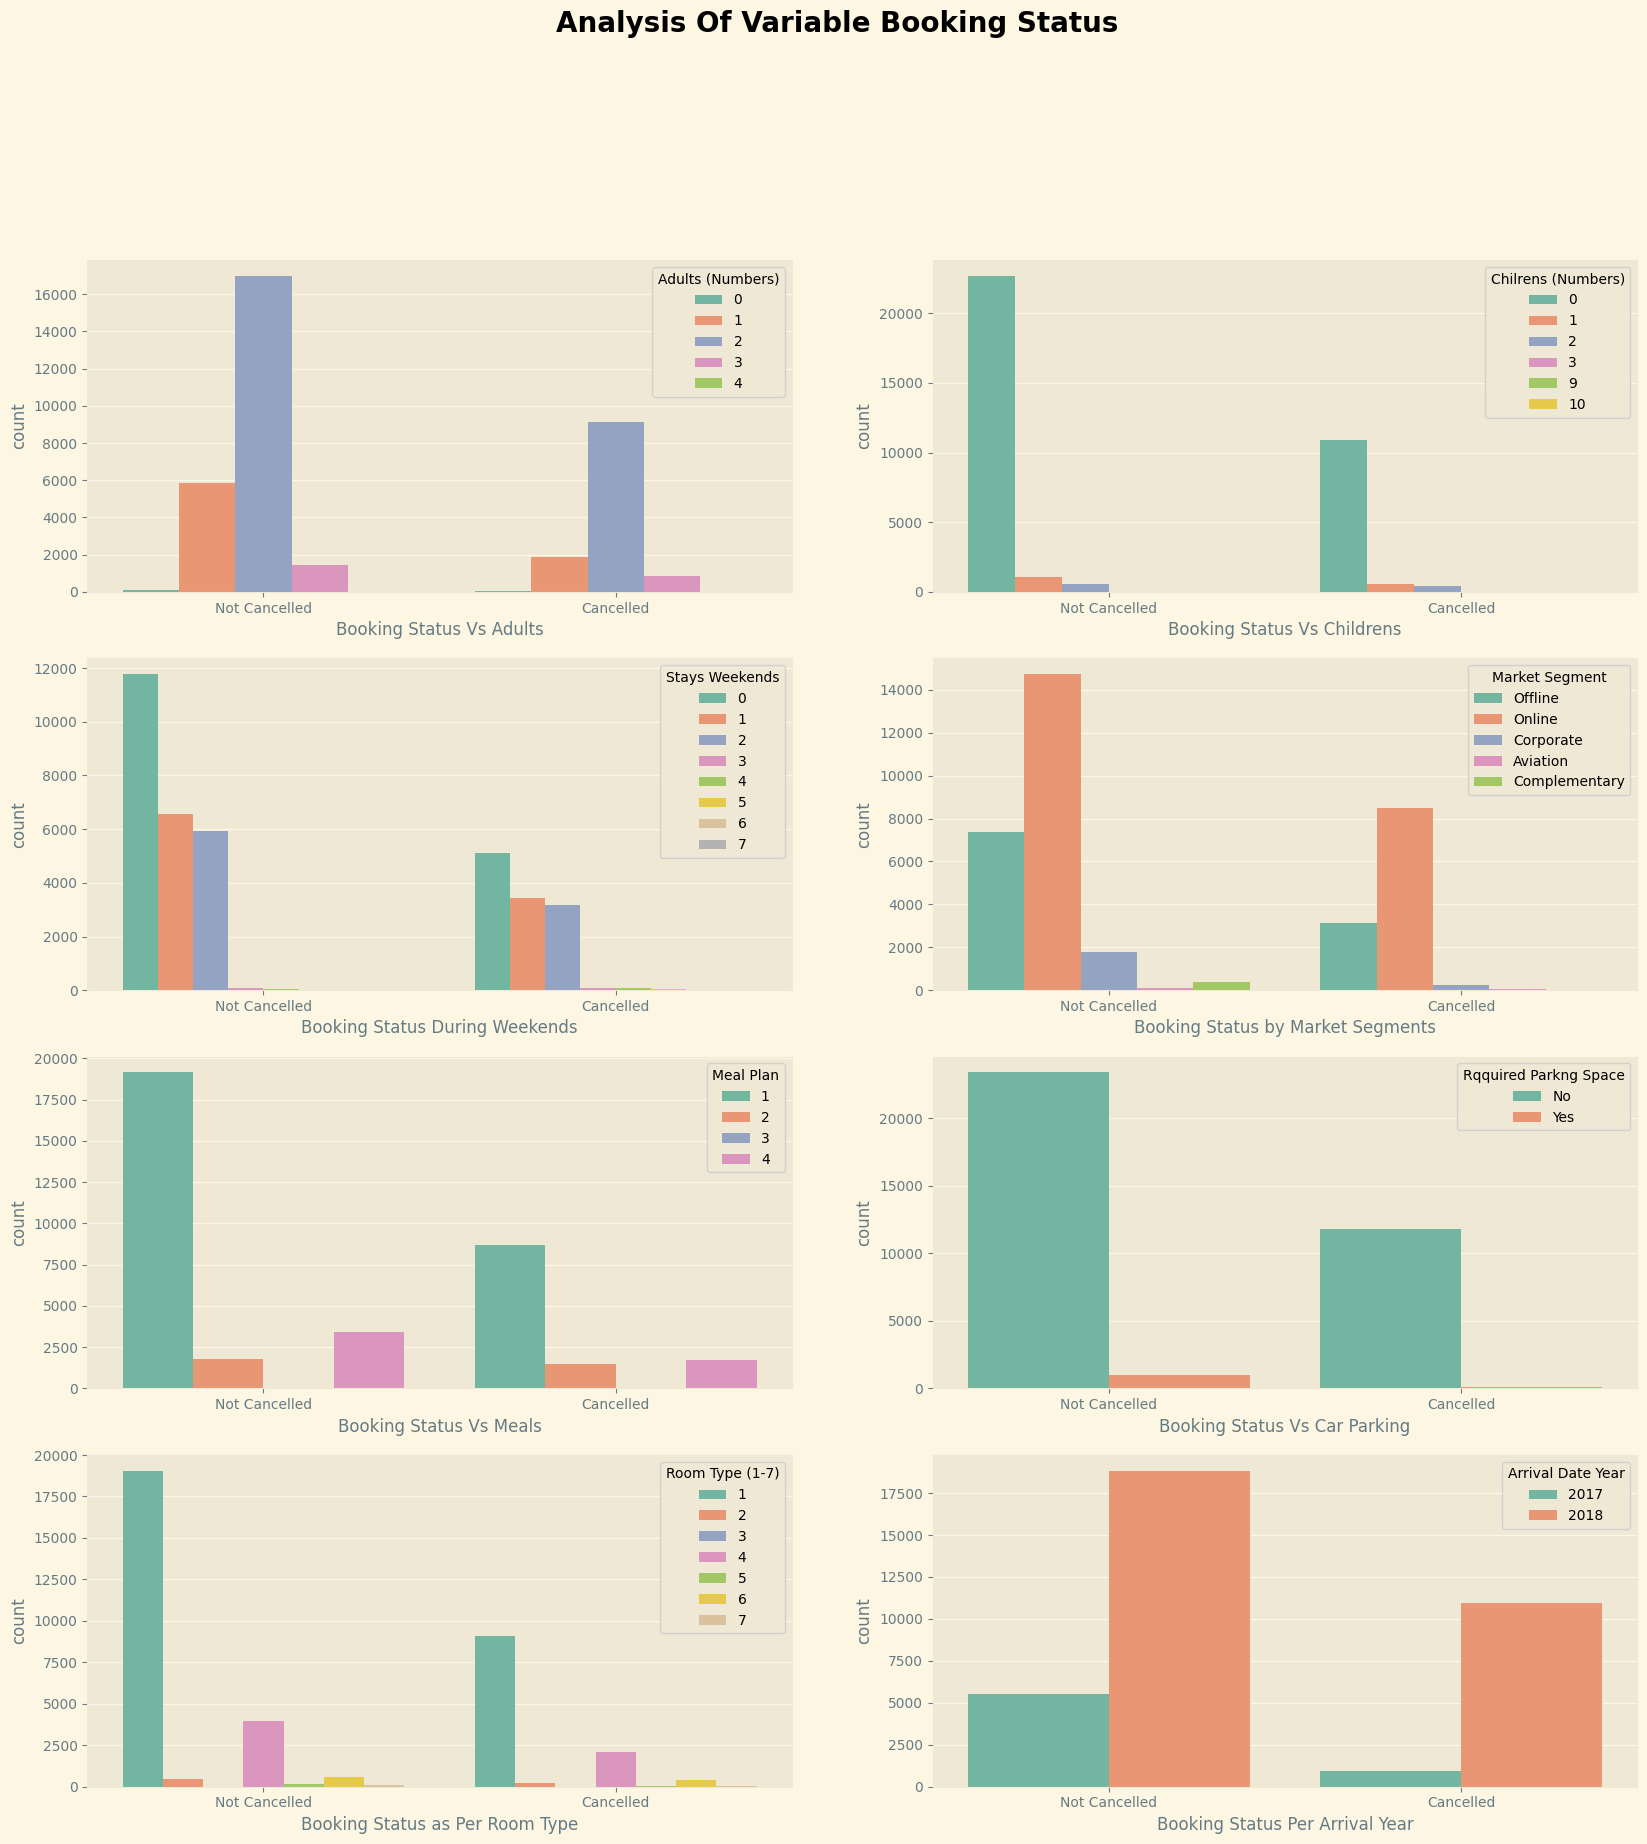

In [20]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Booking Status", fontweight="bold", fontsize=20)


plt.subplot(5, 2, 1)
sns.countplot(x='BookingStatus', palette='Set2', hue='Adults', data=df).legend(title='Adults (Numbers)')
plt.gca().set_xlabel('Booking Status Vs Adults')


plt.subplot(5, 2, 2)
sns.countplot(x='BookingStatus', palette='Set2', hue='Childrens', data=df).legend(title='Chilrens (Numbers)')
plt.gca().set_xlabel('Booking Status Vs Childrens')


plt.subplot(5, 2, 3)
sns.countplot(x='BookingStatus', palette='Set2', hue='Stays_Weekends', data=df).legend(title='Stays Weekends')
plt.gca().set_xlabel('Booking Status During Weekends')


plt.subplot(5, 2, 4)
sns.countplot(x='BookingStatus', palette='Set2', hue='MktSegment', data=df).legend(title='Market Segment')
plt.gca().set_xlabel('Booking Status by Market Segments')


plt.subplot(5, 2, 5)
sns.countplot(x='BookingStatus', palette='Set2', hue='Meals', data=df).legend(title='Meal Plan')
plt.gca().set_xlabel('Booking Status Vs Meals')


plt.subplot(5, 2, 6)
sns.countplot(x='BookingStatus', palette='Set2', hue='Req_Car_Parking_Space', data=df).legend(title='Rqquired Parkng Space')
plt.gca().set_xlabel('Booking Status Vs Car Parking')


plt.subplot(5, 2, 7)
sns.countplot(x='BookingStatus', palette='Set2', hue='Room_Type_Reserved', data=df).legend(title='Room Type (1-7)')
plt.gca().set_xlabel('Booking Status as Per Room Type')


plt.subplot(5, 2, 8)
sns.countplot(x='BookingStatus', palette='Set2', hue='ArrivalDateYr', data=df).legend(title='Arrival Date Year')
plt.gca().set_xlabel('Booking Status Per Arrival Year')

Text(0.5, 0, 'Average Price Per Room')

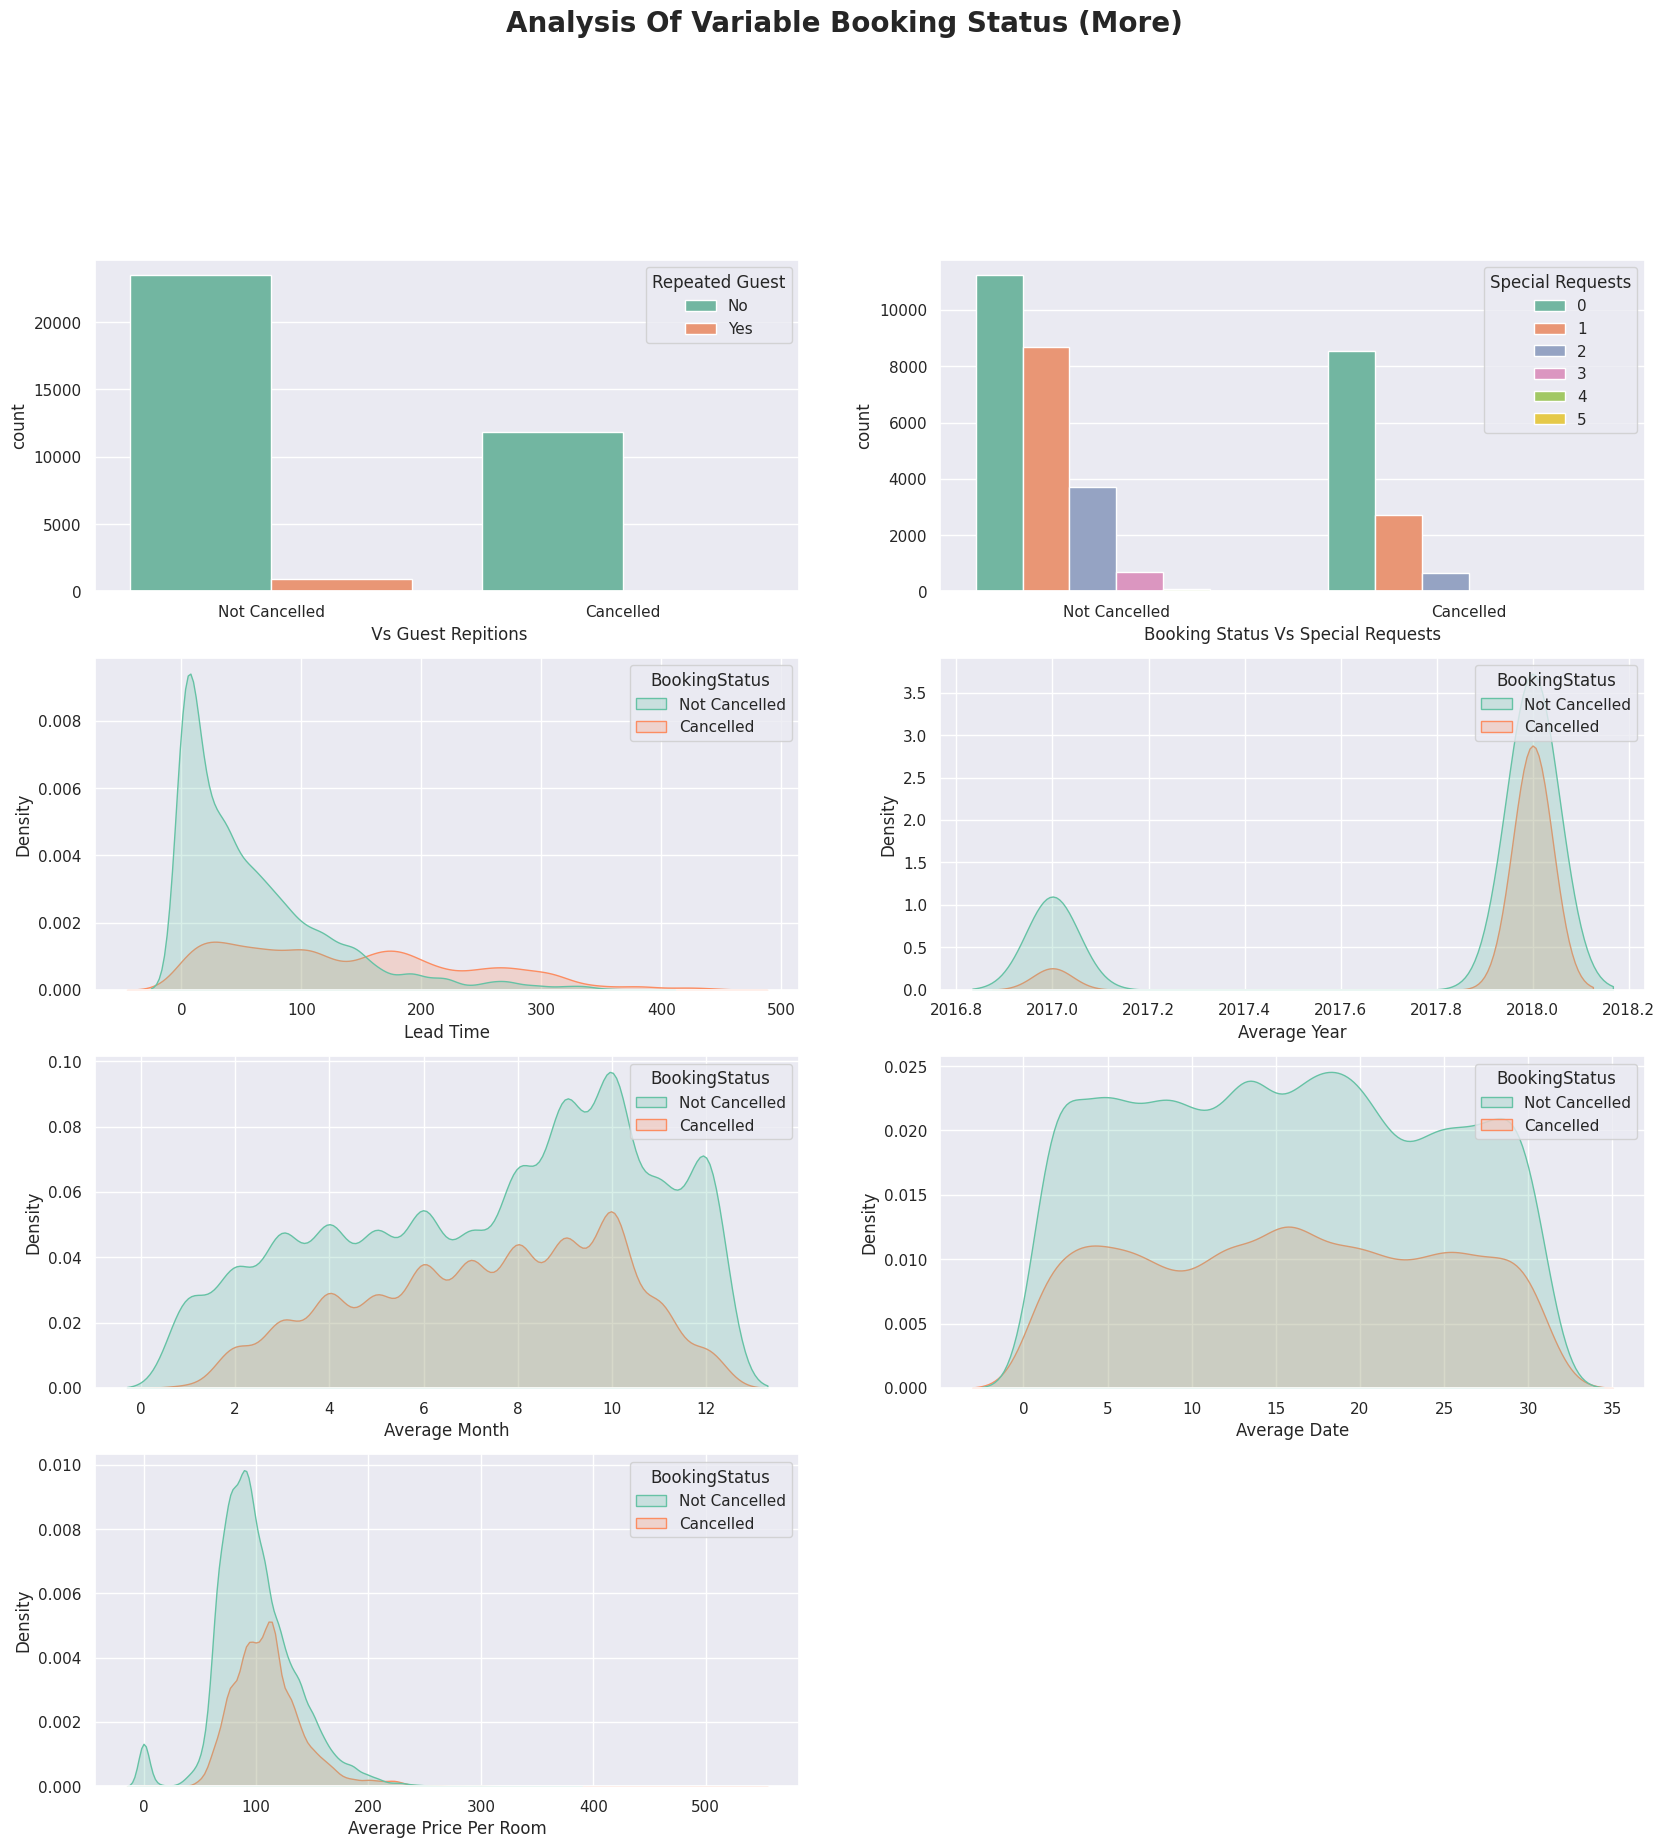

In [21]:
sns.set(color_codes = True)

plt.figure(figsize=(20, 25))
plt.suptitle("Analysis Of Variable Booking Status (More)", fontweight="bold", fontsize=20)

plt.subplot(5, 2, 1)
sns.countplot(x='BookingStatus', palette='Set2', hue='Repeated_Guest', data=df).legend(title='Repeated Guest')
plt.gca().set_xlabel(' Vs Guest Repitions')

plt.subplot(5, 2, 2)
sns.countplot(x='BookingStatus', palette='Set2', hue='SpecialReqs', data=df).legend(title='Special Requests')
plt.gca().set_xlabel('Booking Status Vs Special Requests')


'''
    @brief: Lot of Values -> So, We'll be using KDE Graphs rather than simple Bar-Graphs.
'''
plt.subplot(5, 2, 3)
sns.kdeplot(x='Lead_Time', hue='BookingStatus', palette='Set2', fill=True, data=df)
plt.gca().set_xlabel('Lead Time')

plt.subplot(5, 2, 4)
sns.kdeplot(x='ArrivalDateYr', hue='BookingStatus', palette='Set2', fill=True, data=df)
plt.gca().set_xlabel('Average Year')

plt.subplot(5, 2, 5)
sns.kdeplot(x='ArrivalDateMonth', hue='BookingStatus', palette='Set2', fill=True, data=df)
plt.gca().set_xlabel('Average Month')

plt.subplot(5, 2, 6)
sns.kdeplot(x='ArrivalDateDt', hue='BookingStatus', palette='Set2', fill=True, data=df)
plt.gca().set_xlabel('Average Date')

plt.subplot(5, 2, 7)
sns.kdeplot(x='AvgPrice_PerRoom', hue='BookingStatus', palette='Set2', fill=True, data=df)
plt.gca().set_xlabel('Average Price Per Room')

### **Looking at Booking Status:**
- Generally, guests who request a **parking space**, guests who have **stayed previously** are guests who generally **do not cancel** the reservation.
- Guests who request **special requests** are guests **less likely to cancel**.
- The **biggest distortion** we see here is the **Lead_Time** variable, the **longer** the person takes to book the room, the more likely they **are to cancel**.
- Which makes a lot of sense, another interesting view is that in the **final 3 months** of the year we **usually have less cancellations**.
- Despite, being a **slight incline**, we can see that **more expensive** rooms may also experience **more cancellations**.

### **4. Model building:**
- We'll now look at building a model for our Data.

In [22]:
'''
    @Brief: df.Meals = simpleLabelEncoder.fit_transform(df.Meals)
    @Brief: df.Room_Type_Reserved = simpleLabelEncoder.fit_transform(df.Room_Type_Reserved)
'''
df.drop('Booking_ID', axis=1, inplace=True)
simpleLabelEncoder = LabelEncoder()
df.MktSegment = simpleLabelEncoder.fit_transform(df.MktSegment)
df.BookingStatus = simpleLabelEncoder.fit_transform(df.BookingStatus)

In [23]:
df.head(5)

,Adults,Childrens,Stays_Weekends,Stays_Weeks,Meals,Req_Car_Parking_Space,Room_Type_Reserved,Lead_Time,ArrivalDateYr,ArrivalDateMonth,ArrivalDateDt,MktSegment,Repeated_Guest,PrevCancellations,PrevBookingNotCancelled,AvgPrice_PerRoom,SpecialReqs,BookingStatus
0,2,0,1,2,1,No,1,224,2017,10,2,3,No,0,0,65.00,0,1
1,2,0,2,3,4,No,1,5,2018,11,6,4,No,0,0,106.68,1,1
2,1,0,2,1,1,No,1,1,2018,2,28,4,No,0,0,60.00,0,0
3,2,0,0,2,1,No,1,211,2018,5,20,4,No,0,0,100.00,0,0
4,2,0,1,1,4,No,1,48,2018,4,11,4,No,0,0,94.50,0,0


<Axes: xlabel='BookingStatus', ylabel='count'>

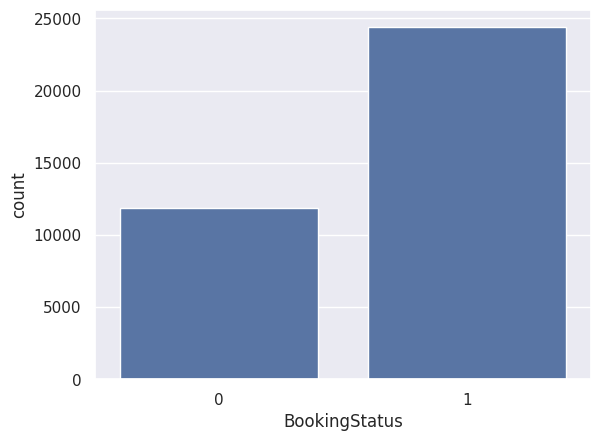

In [24]:
sns.countplot(x=df.BookingStatus)

### What's wrong with above Data ?
- It's not **balanced!**
- There're **outliers**.

Text(0.5, 0, 'Lead Time (Days)')

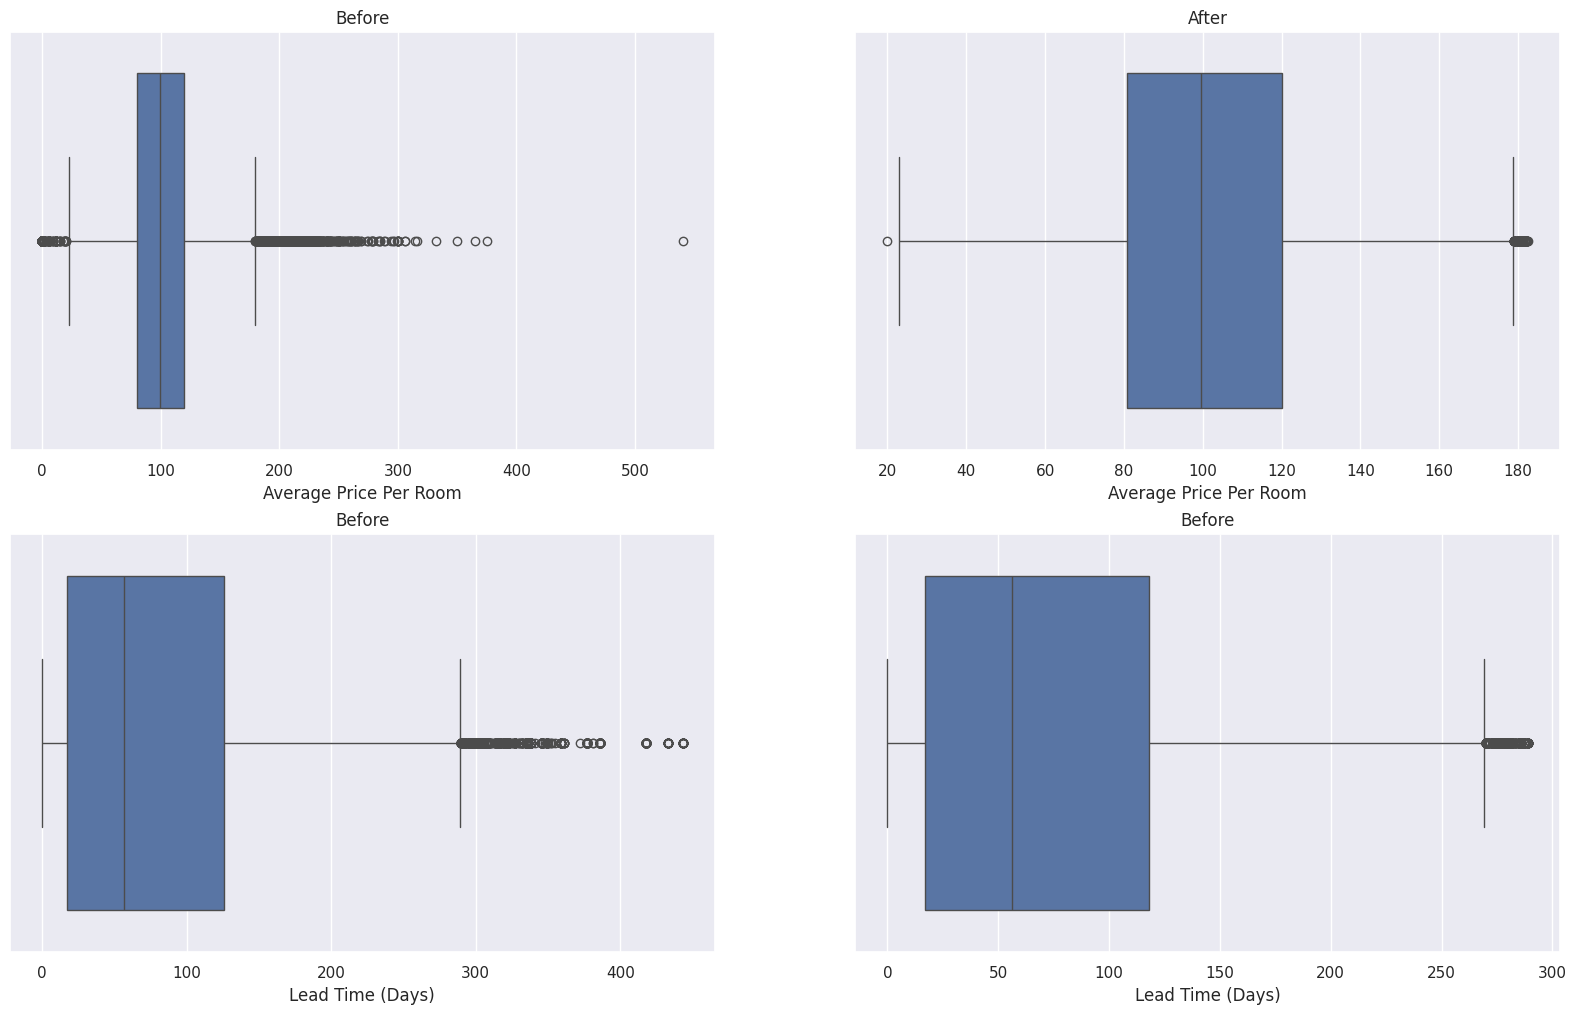

In [25]:
data_encode = remove_outliers(data_encode, "Lead_Time")
data_encode = remove_outliers(data_encode, "AvgPrice_PerRoom")

plt.figure(figsize= (20,25))

plt.subplot(4, 2, 1)
plt.gca().set_title('Before')
sns.boxplot(x=df.AvgPrice_PerRoom)
plt.gca().set_xlabel('Average Price Per Room')

plt.subplot(4, 2, 2)
plt.gca().set_title('After')
sns.boxplot(x=data_encode.AvgPrice_PerRoom)
plt.gca().set_xlabel('Average Price Per Room')

plt.subplot(4, 2, 3)
plt.gca().set_title('Before')
sns.boxplot(x=df.Lead_Time)
plt.gca().set_xlabel('Lead Time (Days)')

plt.subplot(4, 2, 4)
plt.gca().set_title('Before')
sns.boxplot(x=data_encode.Lead_Time)
plt.gca().set_xlabel('Lead Time (Days)')

#### As we have many values of a class and few values of others. We will balance the classes using OverSampling(**RandomOverSampler**) to make the classes balanced.


#### **Why we do Oversampling, and Balancing Altogether?**
- Balancing is often done to address the issue of **class imbalance**.
- Class imbalance occurs when **one class** in a **binary** or **multiclass classification** problem has significantly **fewer instances** than the **other class(es)**.
- Avoid Biased Models, Preventing Information Loss, etc.

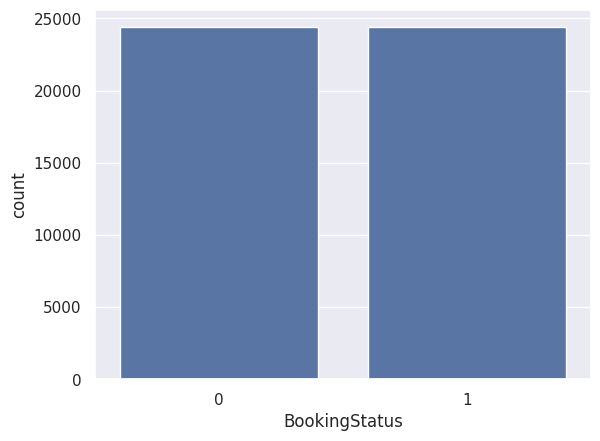

In [26]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('BookingStatus', axis=1)
Y = df['BookingStatus']

ros = RandomOverSampler(random_state=0)
XResampled, YResampled = ros.fit_resample(X, Y)

dfResampled = pd.DataFrame(XResampled, columns=X.columns)  # Create new dataframe with resampled X
dfResampled['BookingStatus'] = YResampled  # Add the resampled Y as a new column
ax = sns.countplot(x=dfResampled['BookingStatus'])

df=dfResampled

#### Predicting Using Linear Regression Model from **sk-learn Module**.

<Axes: xlabel='BookingStatus', ylabel='count'>

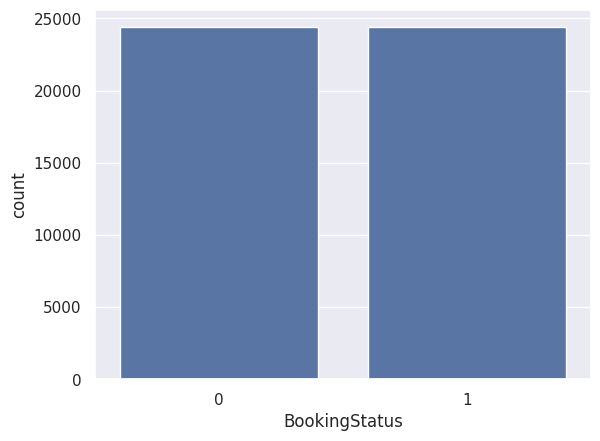

In [27]:
sns.countplot(x = df['BookingStatus'])

In [28]:
df.head(10)
print(f"Unique: {df['Req_Car_Parking_Space'].unique()}")
print(f"Unique: {df['Repeated_Guest'].unique()}")

df['Req_Car_Parking_Space'] = df['Req_Car_Parking_Space'].replace({'Yes': 1, 'No': 0})
df['Repeated_Guest'] = df['Repeated_Guest'].replace({'Yes': 1, 'No': 0})

Unique: ['No' 'Yes']
Unique: ['No' 'Yes']


In [29]:
'''
    @brief:

    X : Feature Set.
    Y : Output Data.
'''

X = df.drop(['BookingStatus'], axis=1)
Y = df['BookingStatus']


In [30]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.4, random_state=101)
Xtr.head()

,Adults,Childrens,Stays_Weekends,Stays_Weeks,Meals,Req_Car_Parking_Space,Room_Type_Reserved,Lead_Time,ArrivalDateYr,ArrivalDateMonth,ArrivalDateDt,MktSegment,Repeated_Guest,PrevCancellations,PrevBookingNotCancelled,AvgPrice_PerRoom,SpecialReqs
45243,0,2,1,4,1,0,2,32,2018,9,12,4,0,0,0,124.25,0
47855,1,0,2,2,1,0,1,163,2018,6,5,3,0,0,0,100.00,0
39709,1,0,1,0,1,0,1,3,2017,10,12,2,0,0,0,65.00,0
10997,2,0,2,2,1,0,1,80,2018,7,15,3,0,0,0,72.25,0
42506,2,2,1,0,1,0,6,56,2018,12,19,4,0,0,0,156.60,0


### **Scaling Down The Values**

In [31]:
# Fit the scaler on the training data and transform both training and testing data
scaler = StandardScaler()
XtrScaled = scaler.fit_transform(Xtr)
XteScaled = scaler.transform(Xte)

### **Using Logistic Regression**

- Accuracy of **78%**

In [32]:
from sklearn.linear_model import LogisticRegression

LogicalReg = LogisticRegression(max_iter=1000)
LogicalReg.fit(XtrScaled, Ytr)

predLogistic = LogicalReg.predict(XteScaled)

accu = accuracy_score(Yte, predLogistic)
repo = classification_report(Yte, predLogistic)

print("Accuracy:", accu)
print("Classification Report:\n", repo)

del(accu, repo)

Accuracy: 0.7824928249282492
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      9648
           1       0.78      0.79      0.79      9864

    accuracy                           0.78     19512
   macro avg       0.78      0.78      0.78     19512
weighted avg       0.78      0.78      0.78     19512



### **SVM Implementation**
- Much Better Results
- Accuracy: **85%** (`With All Data`)
- Accuracy: **84%** (`With 30% Data`)

In [33]:
from sklearn.svm import SVC
from time import time
sample_size = int(0.3 * XtrScaled.shape[0])

# Take 30% of the training data - For Fast Speed of SVM-
XtrSubset = XtrScaled[:sample_size]
YtrSubset = Ytr[:sample_size]

t0 = time()
clf = SVC(C=15)
clf.fit(XtrSubset, YtrSubset)
print(f"Training time: {time() - t0}")

t0 = time()
predSVC = clf.predict(XteScaled)
print(f"Prediction time: {time() - t0}")

print("Accuracy:", accuracy_score(Yte, predSVC))
print("Classification Report:\n", classification_report(Yte, predSVC))

del(clf, t0, predSVC)

Training time: 3.809253692626953
Prediction time: 6.02095890045166
Accuracy: 0.8403546535465355
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      9648
           1       0.85      0.84      0.84      9864

    accuracy                           0.84     19512
   macro avg       0.84      0.84      0.84     19512
weighted avg       0.84      0.84      0.84     19512



### **Decision Trees Implementations**
- Best Implementation (KNN I've not Implemented)
- Accuracy: **90%**

In [34]:
from sklearn.tree import DecisionTreeClassifier

t0 = time()
clf = DecisionTreeClassifier(min_samples_split=10)
clf.fit(XtrScaled, Ytr)

t0 = time()
predDT = clf.predict(XteScaled)
print(f"Training time: {time() - t0}")

print("Accuracy:", accuracy_score(Yte, predDT))
print("Classification Report:\n", classification_report(Yte, predDT))


Training time: 0.004189729690551758
Accuracy: 0.8898113981139811
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      9648
           1       0.91      0.87      0.89      9864

    accuracy                           0.89     19512
   macro avg       0.89      0.89      0.89     19512
weighted avg       0.89      0.89      0.89     19512



### **Implementing KNN**
- Diving Deeper...
- Accuracy: **89%**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

sample_size = int(0.5 * XtrScaled.shape[0])

# Take 30% of the training data - For Fast Speed of SVM-
XtrSubset = XtrScaled[:sample_size]
YtrSubset = Ytr[:sample_size]

KNNModel = KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')
KNNModel.fit(XtrScaled, Ytr)

t0 = time()
predKNN = KNNModel.predict(XteScaled)
print(f"Prediction time: {time() - t0}")

print("Test Accuracy:", accuracy_score(Yte, predKNN))
print("Classification Report:\n", classification_report(Yte, predKNN))


Prediction time: 13.303598880767822
Test Accuracy: 0.8976527265272652
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      9648
           1       0.95      0.85      0.89      9864

    accuracy                           0.90     19512
   macro avg       0.90      0.90      0.90     19512
weighted avg       0.90      0.90      0.90     19512



### **Trying to Use ADABoost Algorithm**
- Achieved **92%** Accuracy!!

In [36]:
from sklearn.ensemble import AdaBoostClassifier

sample_size = int(0.3 * XtrScaled.shape[0])

# Take 30% of the training data - For Fast Speed of SVM-
XtrSubset = XtrScaled[:sample_size]
YtrSubset = Ytr[:sample_size]

adaModel = AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_split=25), n_estimators=50, algorithm='SAMME')

t0 = time()
adaModel.fit(XtrScaled, Ytr)
print(f"Training time: {time() - t0}")

t0 = time()
adaPred = adaModel.predict(XteScaled)
print(f"Prediction time: {time() - t0}")

print("Test Accuracy:", accuracy_score(Yte, adaPred))
print("Classification Report:\n", classification_report(Yte, adaPred))

del(t0, adaPred, adaModel)

Training time: 8.679609537124634
Prediction time: 0.24343347549438477
Test Accuracy: 0.9240979909799097
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      9648
           1       0.94      0.91      0.92      9864

    accuracy                           0.92     19512
   macro avg       0.92      0.92      0.92     19512
weighted avg       0.92      0.92      0.92     19512

